# **Laboratorijska vježba 3**: Zadaci za samostalni rad

## **Podaci iz popisa stanovništa u SAD-u iz 2015. godine**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka dobiven iz popisa stanovništva 2015. godine u SAD-u. Skup podataka dostupan je u *Data/acs2015_county_data.csv*. 


In [ ]:
!head Data/acs2015_county_data.csv

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [ ]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [ ]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## **Zadatak 1: Izračun deskriptivne statistike i testiranje distribucija**

Za numeričke varijable u skupu podataka izračunajte osnovne mjere u okviru deskriptivne statistike. Zatim se fokusirajte na dohodak po stanovniku države (*IncomePerCap*). Koliko u prosjeku zarađuju stanovnici SAD-a? Kolika je medijalna plaća? 

In [ ]:
#srednja vrijednost, medijan, mod
df.describe()

income_mean = df['IncomePerCap'].mean()
income_median = df['IncomePerCap'].median()

print(f"U prosjeku stanovnici SAD-a zarađuju {income_mean} dolara. Medijalna plaća je {income_median}")

U prosjeku stanovnici SAD-a zarađuju 23981.771739130436 dolara. Medijalna plaća je 23460.0


Pokušajte steći dublji uvid u prihod po stanovniku. Može li se prepoznati distribucija iz koje potječi ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

Ne može se prepoznati distribucija jer je p parametar manji od 0.5 i za eksponencijalnu i za normalnu distribuciju.


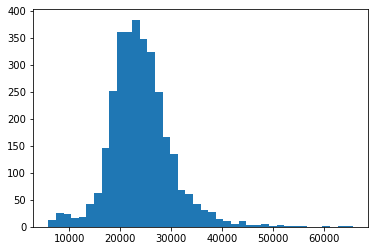

In [31]:
plt.hist(df['IncomePerCap'], bins=40)
diagnostic.kstest_normal(df['IncomePerCap'], dist='norm')
diagnostic.kstest_normal(df['IncomePerCap'], dist='exp')
print("Ne može se prepoznati distribucija jer je p parametar manji od 0.5 i za eksponencijalnu i za normalnu distribuciju.")

Izračunajte osnovne mjere u okviru deskriptivne statistike za broj stanovnika države (*TotalPop*) te prokomentirajte dobivene rezultate.

In [22]:
df['TotalPop'].describe()


count    3.220000e+03
mean     9.940935e+04
std      3.193055e+05
min      8.500000e+01
25%      1.121800e+04
50%      2.603500e+04
75%      6.643050e+04
max      1.003839e+07
Name: TotalPop, dtype: float64

Pokušajte steći dublji uvid u broj stanovnika. Može li se prepoznati distribucija iz koje potječu ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.29877233230219885, 0.0009999999999998899)

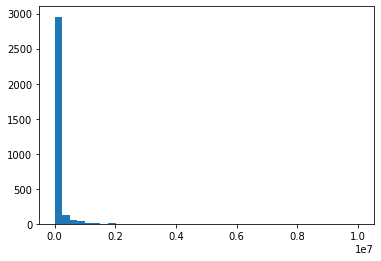

In [32]:
plt.hist(df['TotalPop'], bins=40)
diagnostic.kstest_normal(df['TotalPop'], dist='norm')
diagnostic.kstest_normal(df['TotalPop'], dist='exp')
print("Ne može se prepoznati distribucija jer je p parametar manji od 0.5 i za eksponencijalnu i za normalnu distribuciju.")

## **Zadatak 2: Ispitivanje odnosa između dvije varijable**

Pokušajte odgovoriti na pitanje je li dohodak po stanovniku države u korelaciji s nezaposlenošću. Ispitajte i linearnu i monotonu korelaciju.

koeficijent korelacije između varijabli je -0.55. Linearna korelacija je negativna što znači da kada se jedna varijabla povecava druga se smanjuje.


SignificanceResult(statistic=-0.5610346008485645, pvalue=1.861766816019713e-266)

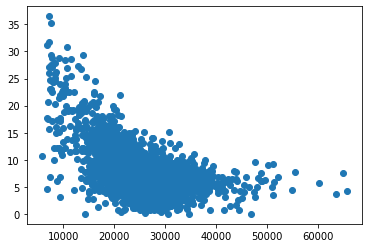

In [38]:
plt.scatter(df['IncomePerCap'],df['Unemployment'])
#linear
stats.pearsonr(df['IncomePerCap'], df['Unemployment'])
print("koeficijent korelacije između varijabli je -0.55. Linearna korelacija je negativna što znači da kada se jedna varijabla povecava druga se smanjuje.")
#monotonic
stats.spearmanr(df['IncomePerCap'], df['Unemployment'])
print("koeficijent korelacije između varijabli je -0.56. Monotona korelacija je negativna što znači da kada se jedna varijabla povecava druga se smanjuje.")


## **Zadatak 3: Testiranje hipoteza**

Zarađuju li stanovnici države New York više od stanovnika države Kalifornija? Pokušajte dati odgovor na ovo pitanje pomoću deskriptivne statistike.

In [43]:
newYorkIncome = df[df['State'] == 'New York']['IncomePerCap'].mean()
californiaIncome = df[df['State'] == 'California']['IncomePerCap'].mean()
print(f"New York average income = {newYorkIncome}, California avearege income = {californiaIncome}")
print("U prosjeku više zarađuju stanovnici New Yorka.")

New York average income = 28189.75806451613, California avearege income = 27902.603448275862


Kako bi potkrijepili dobivene zaključke, provedite testiranje hipoteza. Neka nulta hipoteza pretpostavlja da nema statistički značajne razlike u dohotku stanovnika ovih država. Testirajte hipotezu pomoću dvostranog t-testa (*two-sided t-test*). Prokomentirajte dobivenu $p$-vrijednost te donesite zaključak.

In [64]:
ny = df[df['State'] == 'New York']['IncomePerCap']
cf = df[df['State'] == 'California']['IncomePerCap']
stats.ttest_ind(a=ny, b = cf, equal_var = True)
print("Nulta hipoteza je prihvećena jer iz rezultata testa možemo zaključiti da nema statistički značajne razlike u dohotku stanovnika ovih država.")

Nulta hipoteza je prihavećena jer iz rezultata testa možemo zaključiti da nema statistički značajne razlike u dohotku stanovnika ovih država.


## **Zadatak 4: Kvantificiranje nesigurnosti**

Ponovno promotrimo pitanje zarađuju li stanovnici države New York više od stanovnika države Kalifornija. Ovaj put pokušajte odgovoriti na pitanje pomoću intervala pouzdanosti s razinom pouzdanosti od 95%. Uz izračun, vizualizirajte intervale pouzdanosti na stupčastim dijagramima. 
Pomoć: provjerite preklapaju li se intervali za ove države.

(26362.11277119949, 30017.40335783277)
(25622.335110090782, 30182.871786460943)
Intervali se preklapaju.


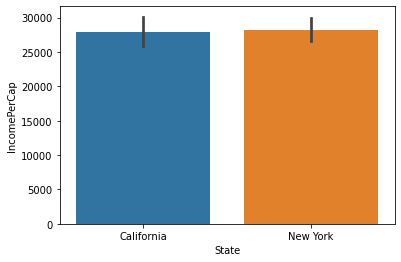

In [66]:
nyReliability = stats.t.interval(confidence=0.95, df=len(ny)-1, loc=np.mean(ny), scale=stats.sem(ny))
cfReliability = stats.t.interval(confidence=0.95, df=len(cf)-1, loc=np.mean(cf), scale=stats.sem(cf))
print(nyReliability)
print(cfReliability)
sns.barplot(df[(df['State'] == 'New York') | (df['State'] == 'California')], x='State', y="IncomePerCap")
print("Intervali se preklapaju.")

## **Zadatak 5: Jačanje gospodarstva poticanjem samozapošljavanja**

Pretpostavimo da je najveći prioritet lokalne uprave u 2018. godini povećanje dohotka po glavi stanovnika. U tu svrhu, dužnosnici planiraju usvojiti strategiju poticanja samozapošljavanja kroz niz kampanja, obrazovnih programa i namjenskih sredstava.

Budući da je neetično i nemoguće u ovom okruženju provoditi kontrolirani eksperiment koji uključuje građane (primjerice, otpustiti zaposlenike i prisiliti ih na samozapošljavanje), dužnosnici su od Vas zatražili da utvrdite učinak samozapošljavanja na gospodarstva, oslanjajući se na podatke iz danog skupa podataka.

Koristeći odgovarajuće grafičke i statističke metode, odredite i kvantificirajte vezu između postotka samozaposlenih građana (*SelfEmployed*) i dohotka po glavi stanovnika u svih 3212 država SAD-a. Zarađuju li građani u državama koje imaju veći postotak samozaposlenih više po glavi stanovnika?

Pilot program ove strategije zahvatit će sve okruge unutar ograničenog skupa od tri države. Skup A uključuje Wisconsin, Tennessee i Minnesotu. Kvantificirajte ovisnost dohotka po glavi stanovnika o stopama samozapošljavanja u skupu A.

In [ ]:
# Mjesto za Vaš kod

U kojoj je državi unutar skupa A opaženi učinak samozapošljavanja na dohodak po glavi stanovnika najjači? Je li ovaj učinak pozitivan ili negativan?

In [ ]:
# Mjesto za Vaš kod

Skup B uključuje države New Jersey, Kansas i Rhode Island. Ponovite analizu iz prijašnjih koraka, ali sada za skup B. U kojem biste od dva skupa A i B preporučili poticanje samozapošljavanja? Objasnite svoje razmišljanje. Što zamjećujete kad u oba skupa promatrate korelaciju unutar svake pojedine države, a što kada promatrate korelaciju za države u cjelini?

In [ ]:
# Mjesto za Vaš kod